
**TOV Stars with Piecewise Polytropic equation of state**

N. Stergioulas

Aristotle University of Thessaloniki

v1.0 (March 2019)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2019 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)


In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import integrate
from scipy import optimize
from scipy.interpolate import PchipInterpolator
import sys
from decimal import Decimal
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from IPython.display import Image

# The TOV equations for stars in Scalar Tensor Theories (STT)

Consider the metric for a spherically symmetric, stationary and asymptotic spacetime in Schwarzshild coordinates $t, r, \theta, \phi$. In the Einstein frame, the metric is
$$ ds^2 = -e^{\nu}dt^2 +e^{\lambda}dr^2 + r^2(d\theta^2+\sin^2\theta d\phi^2)$$
The TOV system in units $c=G=1$ is then (where we denote with $\rho, \epsilon, P$ matter quantities in the Jordan frame: 
$$ P = P(\rho),$$
$$ \epsilon = \epsilon(\rho),$$
$$ \frac{dP}{dr} = -(\epsilon+P)\left[\frac{1}{2}\frac{d\nu}{dr}+\alpha(\varphi)\psi \right]  = -(\epsilon+P)\left[\frac{(m+4\pi A^4({\varphi}) r^3P)}{r(r-2m)}+\frac{1}{2}r\psi^2 + \alpha(\varphi)\psi \right],$$
$$ \frac{dm}{dr} = 4\pi A^4({\varphi}) r^2 \epsilon +\frac{1}{2}r(r-2m)\psi^2,$$
$$ \frac{d\nu}{dr} = \frac{2(m+4\pi A^4({\varphi}) r^3P)}{r(r-2m)}+r\psi^2,$$
$$ \frac{d\varphi}{dr} = \psi $$
$$ \frac{d\psi}{dr} = 4\pi A^4(\varphi) \frac{r}{r-2m}\left[ \alpha(\varphi)
(\epsilon-3p) + r(\epsilon-p)\psi \right] - \frac{2(r-m)}{r(r-2m)}\psi,$$
$$ \lambda = -\ln\left(1-\frac{2m}{r}\right),$$
where 
$$ A(\varphi) = e^{\frac{1}{2}\beta\phi^2}.$$
The central values are
$$ P(0) = P_c,$$
$$ m(0) = 0,$$
$$ \nu(0) = \nu_c,$$
$$\varphi(0) = \varphi_c,$$
$$\psi(0) = 0.$$
The choice of $\nu_c$ and $\varphi_c$ is such that $\lim_{r\rightarrow \infty}\nu=0$ and $\lim_{r\rightarrow \infty}\varphi=0$ (one needs to start with trial values and then apply a minimization method to find the optimal choice). 



# Numerical implementation

## Define the equation of state

In [2]:
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Density = Msun/Length**3

rho1 = pow(10,14.7)/Density
rho2 = pow(10,15.0)/Density

#SLy
p1 = pow(10.0,34.384)/Density/c**2
Gamma1 = 3.005
Gamma2 = 2.988
Gamma3 = 2.851

K1 = p1 / pow(rho1,Gamma1)
K2 = K1 * pow( rho1, Gamma1-Gamma2)
K3 = K2 * pow( rho2, Gamma2-Gamma3)

rhoL_1 = 2.62789e12/Density
rhoL_2 = 3.78358e11/Density
rhoL_3 = 2.44034e7/Density
rhoL_4 = 0.0

GammaL_1 = 1.35692
GammaL_2 = 0.62223
GammaL_3 = 1.28733
GammaL_4 = 1.58425

KL_1 = 3.99874e-8 * pow(Msun/Length**3, GammaL_1-1)
KL_2 = 5.32697e+1 * pow(Msun/Length**3, GammaL_2-1) 
KL_3 = 1.06186e-6 * pow(Msun/Length**3, GammaL_3-1)  
KL_4 = 6.80110e-9 * pow(Msun/Length**3, GammaL_4-1)  

epsL_4 = 0.0
alphaL_4 = 0.0
epsL_3 = (1+alphaL_4)*rhoL_3 + KL_4/(GammaL_4 - 1)*pow(rhoL_3, GammaL_4)
alphaL_3 = epsL_3/rhoL_3 - 1 - KL_3/(GammaL_3 - 1)*pow(rhoL_3, GammaL_3 -1)
epsL_2 = (1+alphaL_3)*rhoL_2 + KL_3/(GammaL_3 - 1)*pow(rhoL_2, GammaL_3)
alphaL_2 = epsL_2/rhoL_2 - 1 - KL_2/(GammaL_2 - 1)*pow(rhoL_2, GammaL_2 -1)
epsL_1 = (1+alphaL_2)*rhoL_1 + KL_2/(GammaL_2 - 1)*pow(rhoL_1, GammaL_2)
alphaL_1 = epsL_1/rhoL_1 - 1 - KL_1/(GammaL_1 - 1)*pow(rhoL_1, GammaL_1 -1)

rho0 = pow(KL_1/K1,1.0/(Gamma1-GammaL_1))
eps0 = (1.0+alphaL_1)*rho0 + KL_1/(GammaL_1-1.0)*pow(rho0,GammaL_1)

alpha1 = eps0/rho0 - 1 - K1/(Gamma1 - 1)*pow(rho0, Gamma1 -1)
eps1 = (1+alpha1)*rho1 + K1/(Gamma1 - 1)*pow(rho1, Gamma1)
alpha2 = eps1/rho1 - 1 - K2/(Gamma2 - 1)*pow(rho1, Gamma2 -1)
eps2 = (1+alpha2)*rho2 + K2/(Gamma2 - 1)*pow(rho2, Gamma2)
alpha3 = eps2/rho2 - 1 - K3/(Gamma3 - 1)*pow(rho2, Gamma3 -1)

pL_3 = KL_3*pow(rhoL_3,GammaL_3)
pL_2 = KL_2*pow(rhoL_2,GammaL_2)
pL_1 = KL_1*pow(rhoL_1,GammaL_1)
p0 = KL_1*pow(rho0,GammaL_1)
p2 = K2*pow(rho2,Gamma2)

In [3]:
args = (rhoL_3,rhoL_2,rhoL_1,rho0,rho1,rho2,KL_4,KL_3,KL_2,KL_1,K1,K2,K3,\
        GammaL_4,GammaL_3,GammaL_2,GammaL_1,Gamma1,Gamma2,Gamma3)

args2 = (rhoL_3,rhoL_2,rhoL_1,rho0,rho1,rho2,KL_4,KL_3,KL_2,KL_1,K1,K2,K3,\
        GammaL_4,GammaL_3,GammaL_2,GammaL_1,Gamma1,Gamma2,Gamma3,\
        pL_3,pL_2, pL_1, p0, p1, p2,\
        alphaL_4, alphaL_3, alphaL_2, alphaL_1, alpha1, alpha2, alpha3)

def P_of_rho(rho, args):
    rhoL_3,rhoL_2,rhoL_1,rho0,rho1,rho2,KL_4,KL_3,KL_2,\
    KL_1,K1,K2,K3,GammaL_4,GammaL_3,GammaL_2,GammaL_1,Gamma1,Gamma2,Gamma3 = args
    if rho<rhoL_3:
        return KL_4*pow(rho,GammaL_4)
    elif rhoL_3<= rho <rhoL_2:
        return KL_3*pow(rho,GammaL_3)
    elif rhoL_2<= rho <rhoL_1:
        return KL_2*pow(rho,GammaL_2)
    elif rhoL_1<= rho <rho0:
        return KL_1*pow(rho,GammaL_1)
    elif rho0<= rho <rho1:
        return K1*pow(rho,Gamma1)
    elif rho1<= rho <rho2:
        return K2*pow(rho,Gamma2)
    else:
        return K3*pow(rho,Gamma3)
    
def rho_of_P(p, args):
    rhoL_3,rhoL_2,rhoL_1,rho0,rho1,rho2,KL_4,KL_3,KL_2,\
    KL_1,K1,K2,K3,GammaL_4,GammaL_3,GammaL_2,GammaL_1,Gamma1,Gamma2,Gamma3 = args
    if p<pL_3:
        return pow(p/KL_4, 1.0/GammaL_4)
    elif pL_3<= p <pL_2:
        return pow(p/KL_3, 1.0/GammaL_3)
    elif pL_2<= p <pL_1:
        return pow(p/KL_2, 1.0/GammaL_2)
    elif pL_1<= p <p0:
        return pow(p/KL_1, 1.0/GammaL_1)
    elif p0<= p <p1:
        return pow(p/K1, 1.0/Gamma1)
    elif p1<= p <p2:
        return pow(p/K2, 1.0/Gamma2)
    else:
        return pow(p/K3, 1.0/Gamma3)

def eps_of_rho(rho, args2):
    rhoL_3,rhoL_2,rhoL_1,rho0,rho1,rho2,KL_4,KL_3,KL_2,KL_1,K1,K2,K3,\
    GammaL_4,GammaL_3,GammaL_2,GammaL_1,Gamma1,Gamma2,Gamma3,\
    pL_3,pL_2, pL_1, p0, p1, p2,\
    alphaL_4, alphaL_3, alphaL_2, alphaL_1, alpha1, alpha2, alpha3 = args2
    if rho<rhoL_3:
        return (1.0+alphaL_4)*rho + KL_4/(GammaL_4-1.0)*pow(rho,GammaL_4)
    elif rhoL_3<= rho <rhoL_2:
        return (1.0+alphaL_3)*rho + KL_3/(GammaL_3-1.0)*pow(rho,GammaL_3)
    elif rhoL_2<= rho <rhoL_1:
        return (1.0+alphaL_2)*rho + KL_2/(GammaL_2-1.0)*pow(rho,GammaL_2)
    elif rhoL_1<= rho <rho0:
        return (1.0+alphaL_1)*rho + KL_1/(GammaL_1-1.0)*pow(rho,GammaL_1)
    elif rho0<= rho <rho1:
        return (1.0+alpha1)*rho + K1/(Gamma1-1.0)*pow(rho,Gamma1)
    elif rho1<= rho <rho2:
        return (1.0+alpha2)*rho + K2/(Gamma2-1.0)*pow(rho,Gamma2)
    else:
        return (1.0+alpha3)*rho + K3/(Gamma3-1.0)*pow(rho,Gamma3)

def eps_of_P(p, args2):
    rhoL_3,rhoL_2,rhoL_1,rho0,rho1,rho2,KL_4,KL_3,KL_2,KL_1,K1,K2,K3,\
    GammaL_4,GammaL_3,GammaL_2,GammaL_1,Gamma1,Gamma2,Gamma3,\
    pL_3,pL_2, pL_1, p0, p1, p2,\
    alphaL_4, alphaL_3, alphaL_2, alphaL_1, alpha1, alpha2, alpha3 = args2    
    if p<pL_3:
        return (1.0+alphaL_4)*pow(p/KL_4, 1.0/GammaL_4)+ p/(GammaL_4-1)
    elif pL_3<= p <pL_2:
        return (1.0+alphaL_3)*pow(p/KL_3, 1.0/GammaL_3)+ p/(GammaL_3-1)
    elif pL_2<= p <pL_1:
        return (1.0+alphaL_2)*pow(p/KL_2, 1.0/GammaL_2)+ p/(GammaL_2-1)
    elif pL_1<= p <p0:
        return (1.0+alphaL_1)*pow(p/KL_1, 1.0/GammaL_1)+ p/(GammaL_1-1)
    elif p0<= p <p1:
        return (1.0+alpha1)*pow(p/K1, 1.0/Gamma1)+ p/(Gamma1-1)
    elif p1<= p <p2:
        return (1.0+alpha2)*pow(p/K2, 1.0/Gamma2)+ p/(Gamma2-1)
    else:
        return (1.0+alpha3)*pow(p/K3, 1.0/Gamma3)+ p/(Gamma3-1)

## Choose the central density and find the central pressure

In [4]:
rho_c = 1.128e+15/Density
eps_c = eps_of_rho(rho_c, args2)
P_c = P_of_rho(rho_c, args)

## Define $A(\varphi)$ and set $\beta$

In [5]:
def A_of_phi(phi,beta):   
        return np.exp(0.5*beta*phi**2)

def alpha_of_phi(phi,beta):   
        return beta*phi

beta = -4.5

args3 = args2 + (beta,)

## Define the system of ODEs to be solved

Define the system $ f(r, {\mathbf y} (r))$ of differential equations to be solved. 

a) In the interior of the star:
$$ f(r, {\mathbf y} (r)) = \frac{d}{dr} \begin{bmatrix} y_0(r)\\ y_1(r) \\ y_2(r) \\ y_3(r) \\ y_4(r) \end{bmatrix}
  = \frac{d}{dr} \begin{bmatrix} P(r)\\ m(r) \\ \nu(r) \\ \varphi(r) \\ \psi(r) \end{bmatrix} = 
  \begin{bmatrix} -(\epsilon+P)\left[\frac{(m+4\pi A^4({\varphi}) r^3P)}{r(r-          
                  2m)}+\frac{1}{2}r\psi^2 + \alpha(\varphi)\psi \right] \\  
                  4\pi A^4({\varphi}) r^2 \epsilon +\frac{1}{2}r(r-2m)\psi^2 \\
                  \frac{2(m+4\pi A^4({\varphi}) r^3P)}{r(r-2m)}+r\psi^2\\
                  \psi(r) \\
                  4\pi A^4(\varphi) \frac{r}{r-2m}\left[ \alpha(\varphi)
                  (\epsilon-3p) + r(\epsilon-p)\psi \right] 
                  - \frac{2(r-m)}{r(r-2m)}\psi
                  \end{bmatrix}$$
                  
b) In the exterior of the star:
$$ f_{\rm ext}(r, {\mathbf y} (r)) = \frac{d}{dr} \begin{bmatrix} y_0(r)\\ y_1(r) \\ y_2(r) \\ y_3(r) \\ y_4(r) \end{bmatrix}
  = \frac{d}{dr} \begin{bmatrix} P(r)\\ m(r) \\ \nu(r) \\ \varphi(r) \\ \psi(r) \end{bmatrix} = 
  \begin{bmatrix} 0 \\  
                  \frac{1}{2}r(r-2m)\psi^2 \\
                  \frac{2m}{r(r-2m)}+r\psi^2 \\
                  \psi(r) \\
                  - \frac{2(r-m)}{r(r-2m)}\psi
                  \end{bmatrix}$$
                  
 


In [6]:
def f(r, y, args2, beta):
    
    rhoL_3,rhoL_2,rhoL_1,rho0,rho1,rho2,KL_4,KL_3,KL_2,KL_1,K1,K2,K3,\
    GammaL_4,GammaL_3,GammaL_2,GammaL_1,Gamma1,Gamma2,Gamma3,\
    pL_3,pL_2, pL_1, p0, p1, p2,\
    alphaL_4, alphaL_3, alphaL_2, alphaL_1, alpha1, alpha2, alpha3 = args2
    
    eps = eps_of_P(y[0], args2) 
    
    A = A_of_phi(y[3],beta)
    
    alpha = alpha_of_phi(y[3],beta)
    
    return [ -( eps + y[0] )*( (y[1] + 4.0*np.pi*A**4*pow(r,3.0)*y[0] )/
                               ( r*(r-2.0*y[1]) ) + 0.5*r*y[4]**2 + alpha*y[4] ), 
            
             4*np.pi*A**4*pow(r,2.0)*eps + 0.5*r*(r-2*y[1])*y[4]**2,
            
             2.0*( y[1] + 4.0*np.pi*A**4*pow(r,3.0)*y[0] )/( r*(r-2.0*y[1])) +r*y[4]**2,
            
             y[4],
            
             4*np.pi*A**4*r/(r-2.0*y[1])*( alpha*(eps-3.0*y[0]) + r*(eps-y[0])*y[4] )
             - 2*(r-y[1])*y[4]/(r*(r-2.0*y[1]))
           ]

In [7]:
def fext(r, y, beta):
    
    A = A_of_phi(y[3],beta)
    
    alpha = alpha_of_phi(y[3],beta)
    
    return [ 0, 
            
             0.5*r*(r-2*y[1])*y[4]**2,
            
             2.0*y[1]/( r*(r-2.0*y[1])) +r*y[4]**2,
            
             y[4],
            
             - 2*(r-y[1])*y[4]/(r*(r-2.0*y[1]))
             
           ]

## Create equidistant grid

In [8]:
N = 32001        # number of grid points

r_max = 128*4.0 * pow( 3.0/(4.0*np.pi*eps_c), 1.0/3.0)     # 4x radius of 1 Msun uniform density Newt. model

r = np.linspace(0.0, r_max, N)
dr = r[1] - r[0]

## Define the main function for the trial solution

In [9]:
def trial_solution(params):
    
    nu_c, phi_c = params
    
    # approximate values at r=dr 
    P_1 =  P_c 
    m_1 =  0
    nu_1 = nu_c
    phi_1 = phi_c
    psi_1 = 0

    y0 = [P_1, m_1, nu_1, phi_1, psi_1]

    solve = integrate.ode(f)
    solve.set_integrator('lsoda', rtol=1e-12, atol=1e-50, ixpr=True);
    solve.set_initial_value(y0, dr);
    solve.set_f_params(args2, beta);
    
    y = np.zeros((len(r), len(y0)))       # create the solution vector
    y[0,:] = [P_c, 0.0, nu_c, phi_c, 0]

    idx = 1
    
    # interior
    
    while solve.successful() and solve.t < r[-1] and solve.y[0]>0.0:
    
          y[idx, :] = solve.y
          solve.integrate(solve.t + dr)
          idx += 1

    idxlast = idx-1 

    R_last = r[idxlast]
    Mass_last = y[idxlast][1]

    # exterior
    
    y0ext = y[idxlast]

    solve = integrate.ode(fext)
    solve.set_integrator('lsoda', rtol=1e-12, atol=1e-50,ixpr=True);
    solve.set_initial_value(y0ext, r[idxlast]);
    solve.set_f_params(beta);

    idx = idxlast

    while solve.successful() and solve.t < r[-1]:
    
          y[idx, :] = solve.y
          solve.integrate(solve.t + dr)
          idx += 1
    
    print("%4.3e %4.3e %4.3e %4.3e %4.3e" % (nu_c, phi_c, y[N-2,2], y[N-2,3], np.sqrt(y[N-2,2]**2 + y[N-2,3]**2)))
    
    return (np.sqrt(y[N-2,2]**2 + y[N-2,3]**2))

## Optimize for parameters that minimize $\nu_c$, $\phi_c$ at infinity (at the outer edge of the grid) 

In [10]:
initial_params = (-1.0, -0.106)
#initial_params = (-1.0, -0.056)

optimal_params = optimize.minimize(trial_solution,initial_params,method='nelder-mead')
#optimal_params = optimize.minimize(trial_solution,initial_params,method='COBYLA')

-1.000e+00 -1.060e-01 2.364e-01 -9.305e-05 2.364e-01
-1.050e+00 -1.060e-01 1.864e-01 -9.305e-05 1.864e-01
-1.000e+00 -1.113e-01 2.314e-01 -4.011e-04 2.314e-01
-1.050e+00 -1.113e-01 1.814e-01 -4.011e-04 1.814e-01
-1.075e+00 -1.139e-01 1.538e-01 -5.717e-04 1.539e-01
-1.125e+00 -1.086e-01 1.089e-01 -2.416e-04 1.089e-01
-1.188e+00 -1.073e-01 4.768e-02 -1.660e-04 4.768e-02
-1.212e+00 -1.153e-01 1.504e-02 -6.613e-04 1.506e-02
-1.294e+00 -1.199e-01 -7.089e-02 -9.980e-04 7.090e-02
-1.325e+00 -1.086e-01 -9.106e-02 -2.416e-04 9.106e-02
-1.262e+00 -1.100e-01 -2.981e-02 -3.200e-04 2.981e-02
-1.287e+00 -1.179e-01 -6.261e-02 -8.493e-04 6.262e-02
-1.212e+00 -1.100e-01 2.019e-02 -3.200e-04 2.019e-02
-1.163e+00 -1.153e-01 6.504e-02 -6.613e-04 6.505e-02
-1.237e+00 -1.113e-01 -6.077e-03 -4.011e-04 6.090e-03
-1.237e+00 -1.166e-01 -1.128e-02 -7.538e-04 1.130e-02
-1.262e+00 -1.126e-01 -3.236e-02 -4.850e-04 3.236e-02
-1.225e+00 -1.146e-01 3.197e-03 -6.162e-04 3.256e-03
-1.225e+00 -1.093e-01 8.318e-03 -2.804e

In [11]:
display(optimal_params.x)

array([-1.23795968, -0.10430266])

## Final numerical solution:

In [12]:
nu_c = optimal_params.x[0]
phi_c = optimal_params.x[1]

P_1 =  P_c 
m_1 =  0
nu_1 = nu_c
phi_1 = phi_c
psi_1 = 0
y0 = [P_1, m_1, nu_1, phi_1, psi_1]

solve = integrate.ode(f)
solve.set_integrator('lsoda', rtol=1e-12, atol=1e-50,ixpr=True);
solve.set_initial_value(y0, dr);
solve.set_f_params(args2,beta);

y = np.zeros((len(r), len(y0)))
y[0,:] = [P_c, 0.0, nu_c, phi_c, 0]

idx = 1

# interior 

while solve.successful() and solve.t < r[-1] and solve.y[0]>0.0:
    
      y[idx, :] = solve.y
      solve.integrate(solve.t + dr)
      idx += 1
        
idxlast = idx-1 

R_last = r[idxlast]
Mass_last = y[idxlast][1]

# exterior

y0ext = y[idxlast]

solve = integrate.ode(fext)
solve.set_integrator('lsoda', rtol=1e-12, atol=1e-50,ixpr=True);
solve.set_initial_value(y0ext, r[idxlast]);
solve.set_f_params(beta);

idx = idxlast

while solve.successful() and solve.t < r[-1]:
    
      y[idx, :] = solve.y
      solve.integrate(solve.t + dr)
      idx += 1



In [13]:

# locate radius more accurately

r_data = np.zeros(4)
h_data = np.zeros(4)
eps_data = np.zeros(4)
rho_data = np.zeros(4)
P_data = np.zeros(4)
dmdr_data = np.zeros(4)

for i in range(idxlast-3,idxlast+1):
    r_data[i-idxlast+3] = r[i]
    eps_data[i-idxlast+3] = eps_of_P(y[i][0],args2)
    rho_data[i-idxlast+3] = rho_of_P(y[i][0],args)
    P_data[i-idxlast+3] = y[i][0]
    h_data[i-idxlast+3] = (eps_data[i-idxlast+3] + P_data[i-idxlast+3]) \
                           / rho_data[i-idxlast+3] -1.0
    dmdr_data[i-idxlast+3] = 4.0*np.pi*r[i]**2*eps_data[i-idxlast+3]

h_interp = PchipInterpolator(r_data, h_data)

Radius = optimize.brentq( h_interp, r_data[0], r_data[3]+3*dr, xtol=1e-16 )

print(Radius)

# Construct table with main solution variables:

values = np.zeros((N, 11)) 

for i in range(0,N): 
    values[i][0] = r[i]
    values[i][1] = rho_of_P(y[i][0], args) # rho
    values[i][2] = eps_of_P(y[i][0], args2) # epsilon
    values[i][3] = y[i][0]   # P
    values[i][4] = y[i][1]   # m
    values[i][5] = y[i][2]   # nu (arbitrary)

values[0][6] = 0.0
for i in range(1,N):     
    values[i][6] = - np.log(1.0-2.0*y[i][1]/r[i])   # lambda
    
values[:, 7] = (values[:, 2] + values[:, 3])/values[:, 1]  # h

for i in range(0,N):
    values[i][8] = y[i][3]   # \phi
    values[i][9] = y[i][4]   # \psi                

for i in range(0,N):
    rho = values[i][1] 
    if rho<rhoL_3:
        values[i][10] = GammaL_4
    elif rhoL_3<= rho <rhoL_2:
        values[i][10] = GammaL_3
    elif rhoL_2<= rho <rhoL_1:
        values[i][10] = GammaL_2
    elif rhoL_1<= rho <rho0:
        values[i][10] = GammaL_1
    elif rho0<= rho <rho1:
        values[i][10] = Gamma1
    elif rho1<= rho <rho2:
        values[i][10] = Gamma2
    else:
        values[i][10] = Gamma3

7.844067100180619


Compute gravitational mass and scalar charge from asymptotic behaviour

In [14]:
dnudr = np.gradient(values[:,5],dr,edge_order=2)
M_asymp_GR = dnudr[N-3]*r[N-3]**2*np.exp(values[N-3,5])/2

dphidr = np.gradient(values[:,8],dr,edge_order=2)

scalar_charge_asymp_GR = -dphidr[N-3]*r[N-3]**2

phi_center = values[0,8]
phi_surface = values[idxlast,8]

print(M_asymp_GR)
print(scalar_charge_asymp_GR*(Length/1e5))
print(phi_center)
print(phi_surface)


1.7191285231311682
-0.48934141640756806
-0.10430266238669865
-0.05554950076423247


# Main results

In [15]:
# c=G=Msun=1

N_gridpoints = N

print('Number of grid points =', N_gridpoints)
print('rho_c =', rho_c)
print('epsilon_c =', eps_c)
print('P_c =', P_c)
print('phi_c =', phi_center)
print('phi_surface =', phi_surface)
print('scalar charge =', scalar_charge_asymp_GR)
print('Radius =', '%.16f'% Radius)
print('Gravitational Mass =', '%.16f'% M_asymp_GR)

Number of grid points = 32001
rho_c = 0.0018274690790913042
epsilon_c = 0.0021075703683837454
P_c = 0.00048466303390058344
phi_c = -0.10430266238669865
phi_surface = -0.05554950076423247
scalar charge = -0.33129895633107437
Radius = 7.8440671001806193
Gravitational Mass = 1.7191285231311682


In [16]:
# CGS

c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Density = Msun/Length**3
dr_CGS = dr*Length
print('rho_c =', rho_c*Density)
print('epsilon_c/c^2 =', eps_c*Density)
print('P_c =', P_c*Density*c**2)
print('scalar charge =', scalar_charge_asymp_GR*Length)
print('Radius =', Radius*Length)
print('Gravitational Mass =', M_asymp_GR*Msun)

rho_c = 1128000000000000.0
epsilon_c/c^2 = 1300891710145366.5
P_c = 2.688643637560329e+35
scalar charge = -48934.14164075681
Radius = 1158599.1539806013
Gravitational Mass = 3.4193466325078935e+33


# Write output files

In [17]:
values_CGS = np.zeros((N, 10)) 

values_CGS[:, 0] = values[:, 0] * Length
values_CGS[:, 1] = values[:, 1] * Density  # rho
values_CGS[:, 2] = values[:, 2] * Density*c**2  # epsilon
values_CGS[:, 3] = values[:, 3] * Density*c**2  # P
values_CGS[:, 4] = values[:, 4] * Msun  # m
values_CGS[:, 5] = values[:, 5]         # nu
values_CGS[:, 6] = values[:, 6]         # lambda
values_CGS[:, 7] = values[:, 7] * c**2  # h
values_CGS[:, 8] = values[:, 8] / Length   # (epsilon+P)^{-1} dP/dr
values_CGS[:, 9] = values[:, 9]         # Gamma

np.savetxt('TOV_output.dat', values)
np.savetxt('TOV_output_CGS.dat', values_CGS)

# Figures

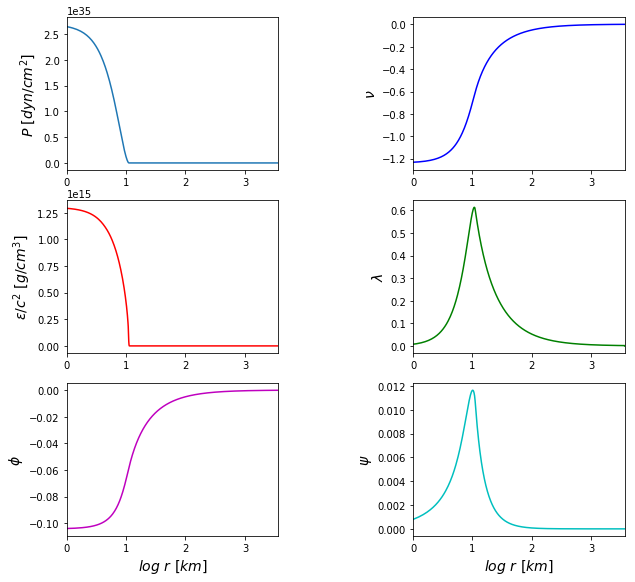

In [18]:
fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 5), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 5), (2, 0), colspan=2)
ax4 = plt.subplot2grid((3, 5), (0, 3), colspan=2)
ax5 = plt.subplot2grid((3, 5), (1, 3), colspan=2)
ax6 = plt.subplot2grid((3, 5), (2, 3), colspan=2)

ax1.plot(np.log10(values[:, 0]*Length/1e5), values_CGS[:, 3])
ax1.set_ylabel(r'$P \ [dyn/cm^2]$', fontsize=14)
ax1.set_xlim((0,np.log10(r[N-1]*Length/1e5)))

ax2.plot(np.log10(values[:, 0]*Length/1e5), values_CGS[:, 2]/c**2, 'r')
ax2.set_ylabel(r'$\epsilon/c^2 \ [g/cm^3]$', fontsize=14)
ax2.set_xlim((0, np.log10(r[N-1]*Length/1e5)));

ax3.plot(np.log10(values[:, 0]*Length/1e5), values[:, 8], 'm')
ax3.set_xlabel(r'$log \ r \ [km]$', fontsize=14)
ax3.set_ylabel(r'$\phi$', fontsize=14)
ax3.set_xlim((0, np.log10(r[N-1]*Length/1e5)));

ax4.plot(np.log10(values[:, 0]*Length/1e5), values[:, 5], 'b')
ax4.set_ylabel(r'$\nu$', fontsize=14)
ax4.set_xlim((0, np.log10(r[N-1]*Length/1e5)))

ax5.plot(np.log10(values[:, 0]*Length/1e5), values[:, 6], 'g')
ax5.set_ylabel(r'$\lambda$', fontsize=14)
ax5.set_xlim((0, np.log10(r[N-1]*Length/1e5)));

ax6.plot(np.log10(values[:, 0]*Length/1e5),values[:,9], 'c')
ax6.set_ylabel(r'$\psi$', fontsize=14)
ax6.set_xlim((0, np.log10(r[N-1]*Length/1e5)));
ax6.set_xlabel(r'$log \ r \ [km]$', fontsize=14)

#fig.tight_layout()

fig.subplots_adjust(left=None, bottom=1, right=None, top=2.2, wspace=None, hspace=None)
plt.show()

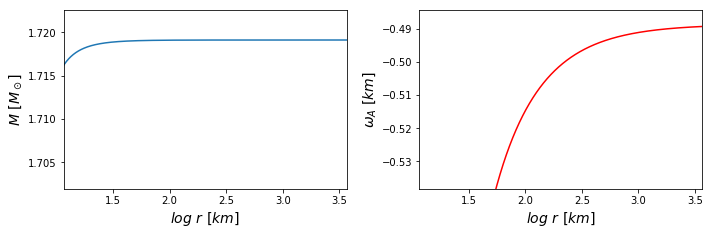

In [19]:
fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)


ax1.plot(np.log10(values[:, 0]*Length/1e5), dnudr*r**2*np.exp(values[:,5])/2)
ax1.set_ylabel(r'$M \ [M_\odot]$', fontsize=14)
ax1.set_xlim((np.log10(r[idxlast]*Length/1e5),np.log10(r[N-4]*Length/1e5)))
ax1.set_ylim(((0.99*dnudr[N-4]*r[N-4]**2*np.exp(values[N-4,5])/2),1.002*dnudr[N-4]*r[N-4]**2*np.exp(values[N-4,5])/2))
ax1.set_xlabel(r'$log \ r \ [km]$', fontsize=14)

ax2.plot(np.log10(values[:, 0]*Length/1e5), -dphidr*r**2*Length/1e5, 'r')
ax2.set_ylabel(r'$\omega_A \ [km]$', fontsize=14)
ax2.set_xlim((np.log10(r[idxlast]*Length/1e5), np.log10(r[N-4]*Length/1e5)))
ax2.set_ylim((-1.1*dphidr[N-4]*r[N-4]**2*Length/1e5,-0.99*dphidr[N-4]*r[N-4]**2*Length/1e5))
ax2.set_xlabel(r'$log \ r \ [km]$', fontsize=14)


fig.tight_layout()

plt.show()